# Comparativa de la solución numérica de la ecuación de advección-difusión 

**Objetivo general**
- Llevar a cabo una comparación de los metodologías de la solución numérica de la ecuación de advección-difusión (EAD) utilizada para transporte de especies. Esto con el objetivo de seleccionar la más conveniente para el proyecto **Ciencia de Frontera Especies Contaminantes de Nitrógeno** 

**Objetivos particulares**
- Realizar un estudio de sensibilidad de la solución 1D, 2D y posiblemente 3D de las diferentes métodologías.
- Identificar los parametros fisicos y numéricos más importantes.
- Seleccionar la metodología conveniente
  

# Contenido
- [1 - Resolución de un problema de ingeniería mediante matemática computacional](#1)
- [2 - Métodos tradicionales por diferencias finitas](#2)
- [3 - Método EMA](#3)

<a name='1'></a>
# 1. Resolución de un problema de ingeniería mediante matemática-numérica computacional 
Un problema de ingeniería se resuelve numéricamente siguiendo los siguientes pasos:
* Definir un esquema físico conceptual, descripción de lo que se quiere resolver.
* Definir la ecuación matemática, generalmente una EDP que "mejor" describa el esquema o modelo físico.
* Definir la métodología numérica de solución.
* Definir el lenguaje de programación e implementación computacional.

 [1.1 - Definir un esquema físico conceptual (problema unidimensional)](#1-1)

Se tiene un acuifero subterraneo en una capa o layer uniforme con sus fronteras superior e inferior impermeables que se extiende por una longitud $L$, por el cual se infiltra agua por el extremo izquierdo transportando una sola especie de concetración $C$ y tiene salida por el extremo derecho. Obtenga el perfil de concentración $C(x)$ en todo el acuifero. 

Debido a la naturaleza problema, se puede plantear de forma unidimensional.

<img src="fig1D.png" width="500px" height="auto" />

[1.2 - Definir una EDP para describir el proceso](#1-2)

La ecuación de advección difusión que rige el transporte de una especie esta dada por:

$$\theta \frac{\partial c}{\partial t} = -q \nabla c + D_{H}\nabla^{2} c + r(c_{r}-c)$$

En una dimensión: 
$$\theta \frac{\partial c}{\partial t} = -q \frac{\partial c}{\partial x}  + D_{H}\frac{\partial^{2} c}{\partial x^{2}} + r(c_{r}-c) \tag{1.1}$$

donde $c$ reprenta la concentración de una especie, $q$ el flujo del fluido que transporta esa especie, $D_{H}$, el coeficiente de difusión, $r$ la recarga y $c_{r}$ la concentración de la especie en la recarga, es decir, $r>0$.  Si $r<0$, entonces $c_{r}=c$ (sale agua residente). Pero si $r<0$ y existe evaporación, entonces $c_{r}=0$, (no sale masa). 

**Condiciones de frontera e iniciales**

En las entradas:
$$qc-D_{H}\frac{\partial c}{\partial x}= q_{inf}c_{inf} $$
$$-qc+D_{H}\frac{\partial c}{\partial x}= qc <-> D_{H}\frac{\partial c}{\partial x}=0 $$

Para adimensionalizar la ecuación se utilizan los siguientes parámetros: 

1. Longitud caracteristica $L_{c}=\frac{D_{H}}{q}$.
2. Tiempo caracteristico: $t_{c}=\frac{\theta D_{H}}{q^{2}}$.
3. Concentración caracteristica $c_{c}=c_{inf}$.
4. Recarga caracteristica $r_{c}=\frac{q}{L_{c}}$ recarga que, aplicada sobre $L_{c}$, produce un flujo $q$.

Entonces las variables adimensionales son: $x_{D}=\frac{x}{L_{c}}=\frac{qx}{D_{H}}$, $t_{D}=\frac{t}{t_{c}}=\frac{q^{2}t}{\theta D_{H}}$ y $c_{D}=\frac{c}{c_{c}}=\frac{c}{c_{inf}}$, reecribiendo la ecuación (1.1), en variables adimensionales se obtiene:

$$\frac{\partial c_{D}}{\partial t_{D}} = -\frac{\partial c_{D}}{\partial x_{D}}  + \frac{\partial^{2} c_{D}}{\partial x_{D}^{2}} + r_{D}(c_{rD}-c_{D}) \tag{1.2}$$

<a name='2'></a>
# 2. Métodos tradicionales por diferencias finitas

Se propone la utilización de un malla por celdas o bloques centrados, donde las celdas pueden ser o no uniformes, suponemos $q_{inf}$, en $x=0$ y recarga en todo el dominio. Adicionalmente se supone flujo estacionario, es decir, $q$ solo varía con la posición pero es independiente del tiempo, para ello el flujo en las interfaces es $q_{i+1/2}=q_{i-1/2}+r{i} \Delta x$.  

Siguiendo la métodogía tradicional, se utiliza primero un esquema implícito en el tiempo y diferencias finitas centrales para resolver la ecuación (1), es decir, sin adimensionalizar:

$$\theta \frac{\partial c}{\partial t} = -q \frac{\partial c}{\partial x}  + D_{H}\frac{\partial^{2} c}{\partial x^{2}} + r(c_{r}-c) \tag{1.1}$$

Considerando el esquema de celdas centrales:

<img src="fig3.png" width="350px" height="auto" />

Discretizando con diferencias finitas centrales término a término de la ecuación (2.1):

**Término acumulativo o temporal:** 
$$\theta\frac{\partial c}{\partial t}=\theta_{i}\frac{c^{n+1}_{i}-c^{n}_{i}}{\Delta t}   $$

**Término advectivo**
$$-q\frac{\partial c}{\partial x}=-q_i^{n+1}\frac{c_{i+1}^{n+1}-c_{i-1}^{n+1}}{2\Delta x_{i}}$$

**Término difusivo**
$$D_H\frac{\partial^2c}{\partial x^2}=D_{Hi}^{n+1}\frac{c_{i-1}^{n+1}-2c_{i}^{n+1}+c_{i+1}^{n+1}}{\Delta x_{i}^{2}}$$

**Término fuente:  sumidero, fuente o reactivo**
$$r\left(c_r-c\right)=r_{i}\left(c_{ri}^{n+1}-c_{i}^{n+1}\right)$$

Sustituyendo los térmios anteriores en la ec. (2.1), desarrollando y agrupando términos en forma de sistema líneal de ecuaciones:

$$T_{E}c_{i+1}^{n+1}+T_{C}c_{i}^{n+1}+T_{W}c_{i-1}^{n+1}=B_{i}$$ 


In [1]:
#------------------------------------------------------------------------------------------#
#-------------------------- Importación de bibliotecas a utilizar -------------------------#
#------------------------------------------------------------------------------------------#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.sparse import lil_matrix           #Importación del modulo scipy que convierte una matriz en una lista
from scipy.sparse import csr_matrix           #Importación del modulo csr_matrix para emplear el método CSR para la solución del sistema de ecuaciones
from scipy.sparse.linalg import spsolve  

from time import time                         #Importación del modulo time para determinar los tiempos de cálculo


In [2]:
#------------------------------------------------------------------------------------------#
#------------- Datos de entrada: Fuente hoja de cálculo excel WMA -------------------------#
#------------------------------------------------------------------------------------------#

long_x = 15.0                         #Longitud en "x" en [ft]
teta = 1.0                            #Adimensional [Adim.]
DH = 1.0                              #coefciente de difusión??? [m2/dia]
r = -0.02                             #recarga o descarga  [1/dia]
cr = 0.0                              #concentración de recarga [Adim.]
nds_x = 30                            #Cantidad de nodos en "x"
t_sim = 50.8                          #Tiempo de simulación (dias)
dt = 0.4                              #Paso de tiempo (dias)
q_inf = 1.0                           #Condición de frontera izquierda en [m/dia]
c_inf = 0.0                           #Condición de frontera izquierda en [m/dia]
c_out = 0.0                           #Condición de frontera derecha en [m/dia]
long_ini_cini = 1.0                   #Posición inicial de las condiciones iniciales de concentraciones en [ft]
long_fin_cini = 7.5                   #Posición final de las condiciones iniciales de concentraciones en [ft]


In [3]:
#------------------------------------------------------------------------------------------#
#--------------------------- Malla de simulación espcio y tiempo ----------------------------#
#------------------------------------------------------------------------------------------#

delta_x = long_x/nds_x                                           #Delta en "x" considerando un espaciamiento homogéneo entre nodos en [m]
xi = np.linspace((delta_x)/(2), long_x-(delta_x/2), nds_x)        #Posición de los nodos en "i" en [m]
x_frntrs = np.linspace(0, long_x, nds_x+1)                      #Posición de las fronteras "i+1/2 e i-1/2" en [m]

t = np.arange(0, t_sim+0.01, dt)           #Vector de tiempo en [Días]
nt = len(t)-1                             #numero de pasos de tiempo 

In [4]:
#------------------------------------------------------------------------------------------#
#---------- Calculando los valores de q para cada nodo y fronteras de la celdas ----------------#
#------------------------------------------------------------------------------------------#

q_frnts = np.zeros(nds_x+1)                       #Vector de q en las fronteras de las celdas en [m/dias]
q_i = np.zeros(nds_x)                             #Vector de q en los nodos o centros "i" en [m/dias]
for i in range(0, nds_x+1):
    if i == 0:
        q_frnts[i] = q_inf                        #Valor de q en 0-1/2 de la primera frontera (que sería la condición de frontera izquierda de qinf)
    else:
        q_frnts[i] = q_frnts[i-1]+(r*delta_x)    #Valor de q en las demás fronteras en i-1/2, i+1/2 
        q_i[i-1] = (q_frnts[i-1]+q_frnts[i])/2   #Valor de q en los nodos i


In [5]:
#------------------------------------------------------------------------------------------#
#------ Definiendo vectores y matriz  para el sistema de eq lineales ---------------------#
#------------------------------------------------------------------------------------------#

TE = np.zeros(nds_x)                          #Vector de transmisibilidad en i+1/2
TW = np.zeros(nds_x)                          #Vector de transmisibilidad en -1/2
TC = np.zeros(nds_x)                          #Vector central C
B = np.zeros(nds_x)                           #Vector de valores conocidos, lado derecho 
mtrz_coef = np.zeros((nds_x, nds_x))          #Matriz de coeficientes para la solución del sistema de ecuaciones
c_ini = np.zeros(nds_x)                       #Vector de condiciones iniciales de c
c_n = np.zeros(nds_x)                         #Vector de valor de c a un paso de tiempo n (necesario para la solución del sistema de ecuaciones)
c_v = np.zeros(nds_x)                         #Vector de valor de c a un paso de tiempo n+1
solcns_c = np.zeros((nt+1, nds_x))            #Matriz de guardado de las c para cada paso de tiempo y en toda la malla 1D (incluyendo las condiciones iniciales al tiempo cero)


In [6]:
#------------------------------------------------------------------------------------------#
#---------------------------- Definiendo condiciones iniciales ----------------------------#
#------------------------------------------------------------------------------------------#

for i in range(0, nds_x):
    if xi[i] >= long_ini_cini and xi[i] <= long_fin_cini:   #Si los nodos en xi están dentro de este rango se tiene la condición inicial de c = 1
        c_ini[i] = 1
    else:
        c_ini[i] = 0                          #Si los nodos en xi no se encuentran dentro del rango se tiene la condición inicial de c = 0

c_n[:] = c_ini[:]                             #Inicializando el vector c_n
solcns_c[0][:] = c_n[:]                       #Guardando el valor de las condiciones iniciales en la matriz de soluciones de c


In [7]:
#------------------------------------------------------------------------------------------#
#------------------------ Inicio del ciclo solución en el tiempo --------------------------#
#------------------------------------------------------------------------------------------#
tiempoComputo_inicial = time()       

for ti in range(0, nt):
        
    #--------------------------------------------------------------------------------------#
    #----------------- Calculando transmisibilidades en i, i+1/2 e i-1/2 ------------------#
    #--------------------------------------------------------------------------------------# 
    
    for i in range(0, nds_x):                                                               #Se calculó la transmisibilidad en todos los nodos ya que se considera el nodo fantasma para las condiciones de frontera, entonces, el nodo en nx+1/2 se utilizará en B
        TE[i] = -(q_i[i])/(2*delta_x)+DH/delta_x**2                             #Transmisibilidad en xi+1/2
        TW[i] =  (q_i[i])/(2*delta_x)+ DH/delta_x**2                              #Transmisibilidad en xi-1/2    
        TC[i] = -(TE[i]+TW[i]+r+(teta/dt))
        
        if i==0:
            TC[i]=TC[i]-TW[i]

        if i==nds_x-1:
            TC[i]=TC[i]+TE[i]

            
    for i in range(0, nds_x):
        if i == 0:
            B[i] = -((teta/dt)*(c_n[i]))-(r*cr)-2*TW[i]*c_inf              #Condición de frontera izquierda Dirichlet (primera clase)
        else:
            B[i] = -((teta/dt)*(c_n[i]))-(r*cr)
        
    #--------------------------------------------------------------------------------------#
    #------------------------ Calculando la matriz de coeficientes ------------------------#
    #--------------------------------------------------------------------------------------# 
    
    for i in range(0, nds_x):
        mtrz_coef[i][i] = TC[i]
    
    for i in range (0, nds_x-1):
        mtrz_coef[i][i+1] = TE[i]
    
    for i in range (0, nds_x-1):
        mtrz_coef[i+1][i] = TW[i+1]
    
    #--------------------------------------------------------------------------------------#
    #------------------------ Resolviendo el sistema de ecuaciones ------------------------#
    #--------------------------------------------------------------------------------------#
    
    am = lil_matrix(mtrz_coef)                                                              #Función que pasa de una matriz densa a una matriz tipo lista
    am = am.tocsr()
    solcn_cs = spsolve(am, B)                                                               #Resolviendo el sistema de ecuaciones
    
    for i in range (0, nds_x):
        c_v[i] = solcn_cs[i]                                                                #Guardando las soluciones en el vector c_v
        
    solcns_c[ti+1][:] = c_v[:]                                                              #Guardando las soluciones en la matriz de c para cada paso de tiempo
    c_n[:] = c_v[:]                                                                         #Guardando el valor de c al tiempo n que se utilizará en el siguiente paso de tiempo

    print("tiempo de simulacion: " +str(round(dt*(ti+1),2))+" dias" )


#------------------------------------------------------------------------------------------#
#---------------------- Tiempo de ejecución del modelo de simulación ----------------------#
#------------------------------------------------------------------------------------------# 

tiempoComputo_final=time()                                                                         #Toma el valor de tiempo final de ejecución, para  calcuar el tiempo total de la simulación
tiempo_ejec_seg=(tiempoComputo_final-tiempoComputo_inicial)                                               #Calcula el tiempo total de simulación, pasado a segundos
tiempo_ejec_min=(tiempoComputo_final-tiempoComputo_inicial)/60                                            #Calcula el tiempo total de simulación, pasado a minutos
print("\nTiempo de Ejecución:",tiempo_ejec_seg, "[Segundos]","\t", tiempo_ejec_min, "[Minutos]\n")
print("|------------------------------------------------------------------------------|")
print("|-------------------------- FIN DE LA SIMULACIÓN xdxd -------------------------|")
print("|------------------------------------------------------------------------------|")

tiempo de simulacion: 0.4 dias
tiempo de simulacion: 0.8 dias
tiempo de simulacion: 1.2 dias
tiempo de simulacion: 1.6 dias
tiempo de simulacion: 2.0 dias
tiempo de simulacion: 2.4 dias
tiempo de simulacion: 2.8 dias
tiempo de simulacion: 3.2 dias
tiempo de simulacion: 3.6 dias
tiempo de simulacion: 4.0 dias
tiempo de simulacion: 4.4 dias
tiempo de simulacion: 4.8 dias
tiempo de simulacion: 5.2 dias
tiempo de simulacion: 5.6 dias
tiempo de simulacion: 6.0 dias
tiempo de simulacion: 6.4 dias
tiempo de simulacion: 6.8 dias
tiempo de simulacion: 7.2 dias
tiempo de simulacion: 7.6 dias
tiempo de simulacion: 8.0 dias
tiempo de simulacion: 8.4 dias
tiempo de simulacion: 8.8 dias
tiempo de simulacion: 9.2 dias
tiempo de simulacion: 9.6 dias
tiempo de simulacion: 10.0 dias
tiempo de simulacion: 10.4 dias
tiempo de simulacion: 10.8 dias
tiempo de simulacion: 11.2 dias
tiempo de simulacion: 11.6 dias
tiempo de simulacion: 12.0 dias
tiempo de simulacion: 12.4 dias
tiempo de simulacion: 12.8 dias


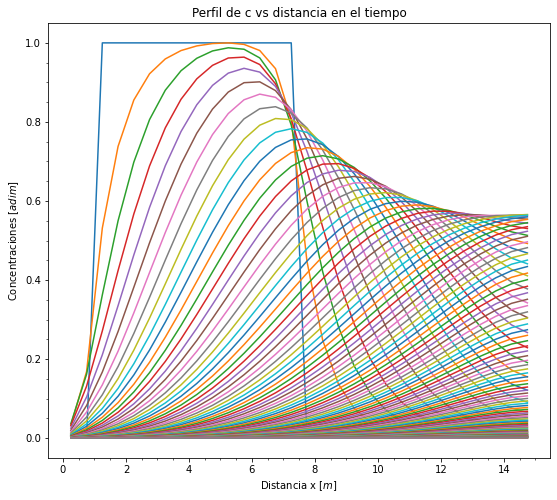

In [8]:
#------------------------------------------------------------------------------------------#
#--------------------------- Graficando todos los resultados ------------------------------#
#------------------------------------------------------------------------------------------#

plt.figure('Graf_cs',figsize=(9,8))
plt.style.use('fast')
plt.minorticks_on()
plt.title('Perfil de c vs distancia en el tiempo')
for i in range(0, nt+1):
    plt.plot(xi, solcns_c[i][:]) 
# plt.legend(loc=4)
plt.xlabel("Distancia x [$m$]")
plt.ylabel("Concentraciones [$adim$]")                                                                        
plt.grid(True,which='major', color='w', linestyle='-')
plt.grid(True, which='minor', color='w', linestyle='--')

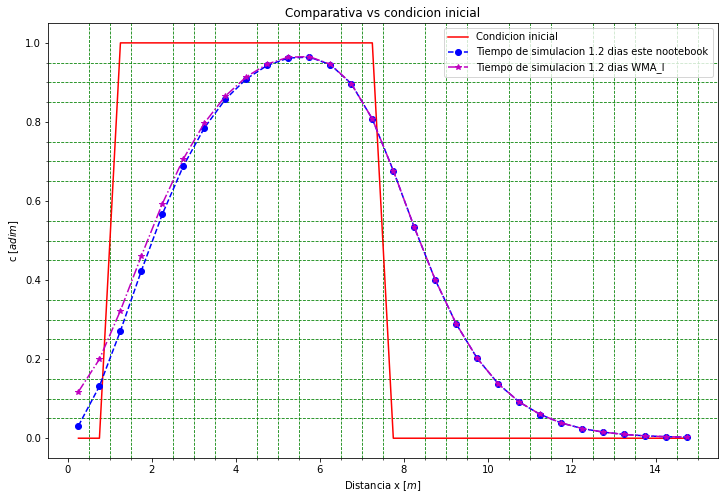

In [9]:
#--------------------------------------------------------------------------------------------------#
#------------------------ Graficando un solo resultado y comparandolo vs WMAI ----------------------#
#---------------------------------------------------------------------------------......---------#


WMA_I=pd.read_excel('comparativa.xlsx', sheet_name='WMA_I')     #Crea un data frame llamado WMA_I a partir de la tabla de excel
#WMA_I
data_set = WMA_I.iloc[13:,9:39].to_numpy()
#data_set

plt.figure('Graf_1r', figsize=(12,8))
plt.title('Comparativa vs condicion inicial')
tsel=3
lg=str(round(tsel*dt,2))
plt.plot(xi, solcns_c[0][:], "-r"  , label="Condicion inicial")
plt.plot(xi, solcns_c[tsel][:], "--bo", label="Tiempo de simulacion "+lg+" dias este nootebook")
plt.plot(xi, data_set[tsel][:], "-.*m", label="Tiempo de simulacion "+lg+" dias WMA_I" )
plt.xlabel("Distancia x [$m$]"), plt.ylabel("c $[adim]$")
plt.legend(loc=0); plt.minorticks_on()
plt.grid(True,which='major', color='w', linestyle='-')
plt.grid(True, which='minor', color='g', linestyle='--')


**SOLUCIÓN EXPLÍCITA**

tiempo de simulacion: 0.1 dias
tiempo de simulacion: 0.2 dias
tiempo de simulacion: 0.3 dias
tiempo de simulacion: 0.4 dias
tiempo de simulacion: 0.5 dias
tiempo de simulacion: 0.6 dias
tiempo de simulacion: 0.7 dias
tiempo de simulacion: 0.8 dias
tiempo de simulacion: 0.9 dias
tiempo de simulacion: 1.0 dias
tiempo de simulacion: 1.1 dias
tiempo de simulacion: 1.2 dias
tiempo de simulacion: 1.3 dias
tiempo de simulacion: 1.4 dias
tiempo de simulacion: 1.5 dias
tiempo de simulacion: 1.6 dias
tiempo de simulacion: 1.7 dias
tiempo de simulacion: 1.8 dias
tiempo de simulacion: 1.9 dias
tiempo de simulacion: 2.0 dias
tiempo de simulacion: 2.1 dias
tiempo de simulacion: 2.2 dias
tiempo de simulacion: 2.3 dias
tiempo de simulacion: 2.4 dias
tiempo de simulacion: 2.5 dias
tiempo de simulacion: 2.6 dias
tiempo de simulacion: 2.7 dias
tiempo de simulacion: 2.8 dias
tiempo de simulacion: 2.9 dias
tiempo de simulacion: 3.0 dias
tiempo de simulacion: 3.1 dias
tiempo de simulacion: 3.2 dias
tiempo d

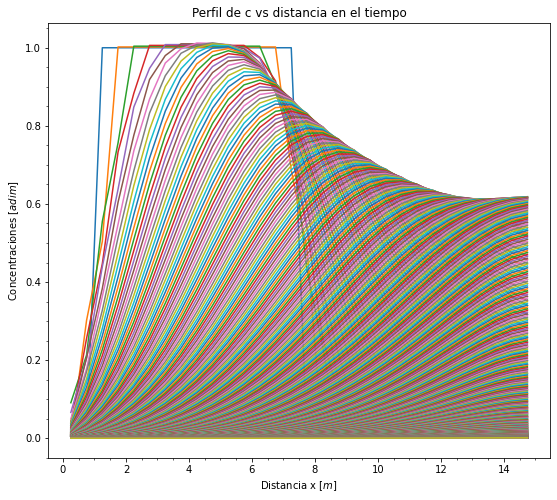

In [10]:
#------------------------------------------------------------------------------------------#
#------------- Datos de entrada: Fuente hoja de cálculo excel WMA -------------------------#
#------------------------------------------------------------------------------------------#

long_x = 15.0                         #Longitud en "x" en [ft]
teta = 1.0                            #Adimensional [Adim.]
DH = 1.0                              #coefciente de difusión??? [m2/dia]
r = -0.02                             #recarga o descarga  [1/dia]
cr = 0.0                              #concentración de recarga [Adim.]
nds_x = 30                            #Cantidad de nodos en "x"
t_sim = 50.8                          #Tiempo de simulación (dias)
#dt = 0.4                              #Paso de tiempo (dias)
dt = 0.1                              #Paso de tiempo (dias)
# dt = 0.01                              #Paso de tiempo (dias)
q_inf = 1.0                           #Condición de frontera izquierda en [m/dia]
c_inf = 0.0                           #Condición de frontera izquierda en [m/dia]
c_out = 0.0                           #Condición de frontera derecha en [m/dia]
long_ini_cini = 1.0                   #Posición inicial de las condiciones iniciales de concentraciones en [ft]
long_fin_cini = 7.5                   #Posición final de las condiciones iniciales de concentraciones en [ft]

#------------------------------------------------------------------------------------------#
#--------------------------- Malla de simulación espcio y tiempo ----------------------------#
#------------------------------------------------------------------------------------------#

delta_x = long_x/nds_x                                           #Delta en "x" considerando un espaciamiento homogéneo entre nodos en [m]
xi = np.linspace((delta_x)/(2), long_x-(delta_x/2), nds_x)        #Posición de los nodos en "i" en [m]
x_frntrs = np.linspace(0, long_x, nds_x+1)                      #Posición de las fronteras "i+1/2 e i-1/2" en [m]

t = np.arange(0, t_sim+0.01, dt)           #Vector de tiempo en [Días]
nt = len(t)-1                             #numero de pasos de tiempo 

#------------------------------------------------------------------------------------------#
#---------- Calculando los valores de q para cada nodo y fronteras de la celdas ----------------#
#------------------------------------------------------------------------------------------#

q_frnts = np.zeros(nds_x+1)                       #Vector de q en las fronteras de las celdas en [m/dias]
q_i = np.zeros(nds_x)                             #Vector de q en los nodos o centros "i" en [m/dias]
for i in range(0, nds_x+1):
    if i == 0:
        q_frnts[i] = q_inf                        #Valor de q en 0-1/2 de la primera frontera (que sería la condición de frontera izquierda de qinf)
    else:
        q_frnts[i] = q_frnts[i-1]+(r*delta_x)    #Valor de q en las demás fronteras en i-1/2, i+1/2 
        q_i[i-1] = (q_frnts[i-1]+q_frnts[i])/2   #Valor de q en los nodos i


#------------------------------------------------------------------------------------------#
#------ Definiendo vectores y matriz  para el sistema de eq lineales ---------------------#
#------------------------------------------------------------------------------------------#

Beta_W = np.zeros(nds_x); Beta_C = np.zeros(nds_x); Beta_E = np.zeros(nds_x); Beta_r = np.zeros(nds_x)                          
Lambda_W = np.zeros(nds_x); Lambda_C = np.zeros(nds_x); Lambda_E = np.zeros(nds_x); Lambda_r = np.zeros(nds_x)                          
c_ini = np.zeros(nds_x)                       #Vector de condiciones iniciales de c
c_n = np.zeros(nds_x)                         #Vector de valor de c a un paso de tiempo n (necesario para la solución del sistema de ecuaciones)
c_v = np.zeros(nds_x)                         #Vector de valor de c a un paso de tiempo n+1
solcns_c = np.zeros((nt+1, nds_x))            #Matriz de guardado de las c para cada paso de tiempo y en toda la malla 1D (incluyendo las condiciones iniciales al tiempo cero)

#------------------------------------------------------------------------------------------#
#---------------------------- Definiendo condiciones iniciales ----------------------------#
#------------------------------------------------------------------------------------------#

for i in range(0, nds_x):
    if xi[i] >= long_ini_cini and xi[i] <= long_fin_cini:   #Si los nodos en xi están dentro de este rango se tiene la condición inicial de c = 1
        c_ini[i] = 1
    else:
        c_ini[i] = 0                          #Si los nodos en xi no se encuentran dentro del rango se tiene la condición inicial de c = 0

c_n[:] = c_ini[:]                             #Inicializando el vector c_n
solcns_c[0][:] = c_n[:]                       #Guardando el valor de las condiciones iniciales en la matriz de soluciones de c

#------------------------------------------------------------------------------------------#
#------------------------ Inicio del ciclo solución en el tiempo --------------------------#
#------------------------------------------------------------------------------------------#
tiempoComputo_inicial = time()       

for ti in range(0, nt):
        
    #--------------------------------------------------------------------------------------#
    #-- Calculando los coeficientes "Beta" y Lambdas se usan las formulas de las diapositivas--------#
    #--------------------------------------------------------------------------------------# 
    
    for i in range(0, nds_x):                                                               
        Beta_W[i] =  q_frnts[i]/(2*delta_x)+DH/(delta_x**2)                              
        Beta_C[i] = -q_frnts[i+1]/(2*delta_x)+q_frnts[i]/(2*delta_x)-(2*DH)/(delta_x**2)-r
        Beta_E[i] = -q_frnts[i+1]/(2*delta_x)+DH/(delta_x**2)                          
        Beta_r[i] =  r

        Lambda_W[i] = (Beta_W[i]*dt)/teta                             
        Lambda_C[i] = 1+(Beta_C[i]*dt)/teta
        Lambda_E[i] = (Beta_E[i]*dt)/teta                          
        Lambda_r[i] = (Beta_r[i]*dt)/teta
        
        #--------------------------------------------------------------------------------------#
        #------------------------------ Solución  ---------------------------------------------#
        #--------------------------------------------------------------------------------------# 
        
        # Hacemos la suma por trozos o bien considerando el nodo central y los dos vecinos
        if i==0:
            c_v[i]=Lambda_W[i]*(2*c_inf-c_n[i])+(Lambda_C[i]+Lambda_r[i])*c_n[i]+Lambda_E[i]*c_n[i+1]  #c_inf dirichlet

        if((i>0)and(i<nds_x-1)):
            c_v[i]=Lambda_W[i]*c_n[i-1]+(Lambda_C[i]+Lambda_r[i])*c_n[i]+Lambda_E[i]*c_n[i+1]  
    
        if i==nds_x-1:
            c_v[i]=Lambda_W[i]*c_n[i-1]+(Lambda_C[i]+Lambda_r[i])*c_n[i]+Lambda_E[i]*c_n[i] #celda dummy c_i+1=c_i 
        

    solcns_c[ti+1][:] = c_v[:]  
    c_n[:] = c_v[:]                                                                         #Guardando el valor de c al tiempo n que se utilizará en el siguiente paso de tiempo

    print("tiempo de simulacion: " +str(round(dt*(ti+1),2))+" dias" )


#------------------------------------------------------------------------------------------#
#---------------------- Tiempo de ejecución del modelo de simulación ----------------------#
#------------------------------------------------------------------------------------------# 

tiempoComputo_final=time()                                                                         #Toma el valor de tiempo final de ejecución, para  calcuar el tiempo total de la simulación
tiempo_ejec_seg=(tiempoComputo_final-tiempoComputo_inicial)                                               #Calcula el tiempo total de simulación, pasado a segundos
tiempo_ejec_min=(tiempoComputo_final-tiempoComputo_inicial)/60                                            #Calcula el tiempo total de simulación, pasado a minutos
print("\nTiempo de Ejecución:",tiempo_ejec_seg, "[Segundos]","\t", tiempo_ejec_min, "[Minutos]\n")
print("|------------------------------------------------------------------------------|")
print("|-------------------------- FIN DE LA SIMULACIÓN xdxd -------------------------|")
print("|------------------------------------------------------------------------------|")


#------------------------------------------------------------------------------------------#
#--------------------------- Graficando todos los resultados ------------------------------#
#------------------------------------------------------------------------------------------#

plt.figure('Graf_cs',figsize=(9,8))
plt.style.use('fast')
plt.minorticks_on()
plt.title('Perfil de c vs distancia en el tiempo')
for i in range(0, nt+1):
    plt.plot(xi, solcns_c[i][:]) 
# plt.legend(loc=4)
plt.xlabel("Distancia x [$m$]")
plt.ylabel("Concentraciones [$adim$]")                                                                        
plt.grid(True,which='major', color='w', linestyle='-')
plt.grid(True, which='minor', color='w', linestyle='--')

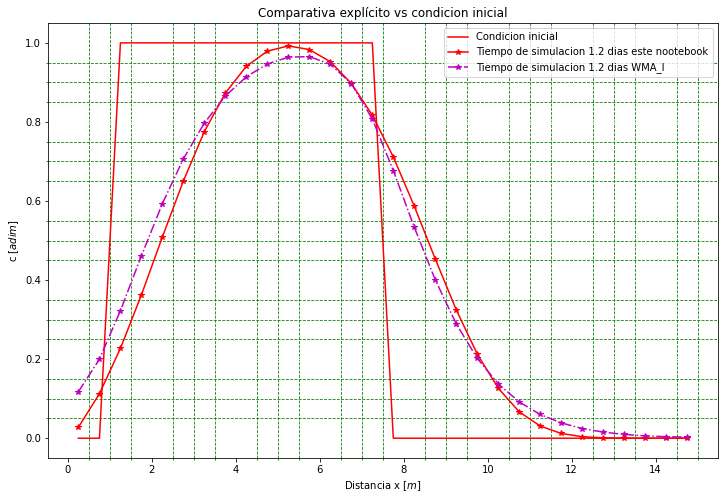

In [11]:
#--------------------------------------------------------------------------------------------------#
#------------------------ Graficando un solo resultado y comparandolo vs WMAI ----------------------#
#---------------------------------------------------------------------------------......---------#


WMA_I=pd.read_excel('comparativa.xlsx', sheet_name='WMA_I')     #Crea un data frame llamado WMA_I a partir de la tabla de excel
#WMA_I
data_set = WMA_I.iloc[13:,9:39].to_numpy()
#data_set

plt.figure('Graf2_1r', figsize=(12,8))
plt.title('Comparativa explícito vs condicion inicial')
tsel=3    #tiempo seleccionado de hoja excel
multiplo=int(0.4/dt)
if multiplo==1:
    tselExp=tsel
else:
    tselExp=multiplo*tsel

lgImp=str(round(tsel*0.4,2))
lgExp=str(round(tselExp*dt,2))
plt.plot(xi, solcns_c[0][:], "-r"  , label="Condicion inicial")
plt.plot(xi, solcns_c[tselExp][:], "-r*", label="Tiempo de simulacion "+lgExp+" dias este nootebook")
plt.plot(xi, data_set[tsel][:], "-.*m", label="Tiempo de simulacion "+lgImp+" dias WMA_I" )
plt.xlabel("Distancia x [$m$]"), plt.ylabel("c $[adim]$")
plt.legend(loc=0); plt.minorticks_on()
plt.grid(True,which='major', color='w', linestyle='-')
plt.grid(True, which='minor', color='g', linestyle='--')

<a name='3'></a>
# 3. Métodos WMA

**WMA SOLUCIÓN EXPLÍCITA**

tiempo de simulacion: 0.01 dias
tiempo de simulacion: 0.02 dias
tiempo de simulacion: 0.03 dias
tiempo de simulacion: 0.04 dias
tiempo de simulacion: 0.05 dias
tiempo de simulacion: 0.06 dias
tiempo de simulacion: 0.07 dias
tiempo de simulacion: 0.08 dias
tiempo de simulacion: 0.09 dias
tiempo de simulacion: 0.1 dias
tiempo de simulacion: 0.11 dias
tiempo de simulacion: 0.12 dias
tiempo de simulacion: 0.13 dias
tiempo de simulacion: 0.14 dias
tiempo de simulacion: 0.15 dias
tiempo de simulacion: 0.16 dias
tiempo de simulacion: 0.17 dias
tiempo de simulacion: 0.18 dias
tiempo de simulacion: 0.19 dias
tiempo de simulacion: 0.2 dias
tiempo de simulacion: 0.21 dias
tiempo de simulacion: 0.22 dias
tiempo de simulacion: 0.23 dias
tiempo de simulacion: 0.24 dias
tiempo de simulacion: 0.25 dias
tiempo de simulacion: 0.26 dias
tiempo de simulacion: 0.27 dias
tiempo de simulacion: 0.28 dias
tiempo de simulacion: 0.29 dias
tiempo de simulacion: 0.3 dias
tiempo de simulacion: 0.31 dias
tiempo de s

tiempo de simulacion: 6.02 dias
tiempo de simulacion: 6.03 dias
tiempo de simulacion: 6.04 dias
tiempo de simulacion: 6.05 dias
tiempo de simulacion: 6.06 dias
tiempo de simulacion: 6.07 dias
tiempo de simulacion: 6.08 dias
tiempo de simulacion: 6.09 dias
tiempo de simulacion: 6.1 dias
tiempo de simulacion: 6.11 dias
tiempo de simulacion: 6.12 dias
tiempo de simulacion: 6.13 dias
tiempo de simulacion: 6.14 dias
tiempo de simulacion: 6.15 dias
tiempo de simulacion: 6.16 dias
tiempo de simulacion: 6.17 dias
tiempo de simulacion: 6.18 dias
tiempo de simulacion: 6.19 dias
tiempo de simulacion: 6.2 dias
tiempo de simulacion: 6.21 dias
tiempo de simulacion: 6.22 dias
tiempo de simulacion: 6.23 dias
tiempo de simulacion: 6.24 dias
tiempo de simulacion: 6.25 dias
tiempo de simulacion: 6.26 dias
tiempo de simulacion: 6.27 dias
tiempo de simulacion: 6.28 dias
tiempo de simulacion: 6.29 dias
tiempo de simulacion: 6.3 dias
tiempo de simulacion: 6.31 dias
tiempo de simulacion: 6.32 dias
tiempo de s

tiempo de simulacion: 13.79 dias
tiempo de simulacion: 13.8 dias
tiempo de simulacion: 13.81 dias
tiempo de simulacion: 13.82 dias
tiempo de simulacion: 13.83 dias
tiempo de simulacion: 13.84 dias
tiempo de simulacion: 13.85 dias
tiempo de simulacion: 13.86 dias
tiempo de simulacion: 13.87 dias
tiempo de simulacion: 13.88 dias
tiempo de simulacion: 13.89 dias
tiempo de simulacion: 13.9 dias
tiempo de simulacion: 13.91 dias
tiempo de simulacion: 13.92 dias
tiempo de simulacion: 13.93 dias
tiempo de simulacion: 13.94 dias
tiempo de simulacion: 13.95 dias
tiempo de simulacion: 13.96 dias
tiempo de simulacion: 13.97 dias
tiempo de simulacion: 13.98 dias
tiempo de simulacion: 13.99 dias
tiempo de simulacion: 14.0 dias
tiempo de simulacion: 14.01 dias
tiempo de simulacion: 14.02 dias
tiempo de simulacion: 14.03 dias
tiempo de simulacion: 14.04 dias
tiempo de simulacion: 14.05 dias
tiempo de simulacion: 14.06 dias
tiempo de simulacion: 14.07 dias
tiempo de simulacion: 14.08 dias
tiempo de sim

tiempo de simulacion: 18.16 dias
tiempo de simulacion: 18.17 dias
tiempo de simulacion: 18.18 dias
tiempo de simulacion: 18.19 dias
tiempo de simulacion: 18.2 dias
tiempo de simulacion: 18.21 dias
tiempo de simulacion: 18.22 dias
tiempo de simulacion: 18.23 dias
tiempo de simulacion: 18.24 dias
tiempo de simulacion: 18.25 dias
tiempo de simulacion: 18.26 dias
tiempo de simulacion: 18.27 dias
tiempo de simulacion: 18.28 dias
tiempo de simulacion: 18.29 dias
tiempo de simulacion: 18.3 dias
tiempo de simulacion: 18.31 dias
tiempo de simulacion: 18.32 dias
tiempo de simulacion: 18.33 dias
tiempo de simulacion: 18.34 dias
tiempo de simulacion: 18.35 dias
tiempo de simulacion: 18.36 dias
tiempo de simulacion: 18.37 dias
tiempo de simulacion: 18.38 dias
tiempo de simulacion: 18.39 dias
tiempo de simulacion: 18.4 dias
tiempo de simulacion: 18.41 dias
tiempo de simulacion: 18.42 dias
tiempo de simulacion: 18.43 dias
tiempo de simulacion: 18.44 dias
tiempo de simulacion: 18.45 dias
tiempo de sim

tiempo de simulacion: 26.71 dias
tiempo de simulacion: 26.72 dias
tiempo de simulacion: 26.73 dias
tiempo de simulacion: 26.74 dias
tiempo de simulacion: 26.75 dias
tiempo de simulacion: 26.76 dias
tiempo de simulacion: 26.77 dias
tiempo de simulacion: 26.78 dias
tiempo de simulacion: 26.79 dias
tiempo de simulacion: 26.8 dias
tiempo de simulacion: 26.81 dias
tiempo de simulacion: 26.82 dias
tiempo de simulacion: 26.83 dias
tiempo de simulacion: 26.84 dias
tiempo de simulacion: 26.85 dias
tiempo de simulacion: 26.86 dias
tiempo de simulacion: 26.87 dias
tiempo de simulacion: 26.88 dias
tiempo de simulacion: 26.89 dias
tiempo de simulacion: 26.9 dias
tiempo de simulacion: 26.91 dias
tiempo de simulacion: 26.92 dias
tiempo de simulacion: 26.93 dias
tiempo de simulacion: 26.94 dias
tiempo de simulacion: 26.95 dias
tiempo de simulacion: 26.96 dias
tiempo de simulacion: 26.97 dias
tiempo de simulacion: 26.98 dias
tiempo de simulacion: 26.99 dias
tiempo de simulacion: 27.0 dias
tiempo de sim

tiempo de simulacion: 33.76 dias
tiempo de simulacion: 33.77 dias
tiempo de simulacion: 33.78 dias
tiempo de simulacion: 33.79 dias
tiempo de simulacion: 33.8 dias
tiempo de simulacion: 33.81 dias
tiempo de simulacion: 33.82 dias
tiempo de simulacion: 33.83 dias
tiempo de simulacion: 33.84 dias
tiempo de simulacion: 33.85 dias
tiempo de simulacion: 33.86 dias
tiempo de simulacion: 33.87 dias
tiempo de simulacion: 33.88 dias
tiempo de simulacion: 33.89 dias
tiempo de simulacion: 33.9 dias
tiempo de simulacion: 33.91 dias
tiempo de simulacion: 33.92 dias
tiempo de simulacion: 33.93 dias
tiempo de simulacion: 33.94 dias
tiempo de simulacion: 33.95 dias
tiempo de simulacion: 33.96 dias
tiempo de simulacion: 33.97 dias
tiempo de simulacion: 33.98 dias
tiempo de simulacion: 33.99 dias
tiempo de simulacion: 34.0 dias
tiempo de simulacion: 34.01 dias
tiempo de simulacion: 34.02 dias
tiempo de simulacion: 34.03 dias
tiempo de simulacion: 34.04 dias
tiempo de simulacion: 34.05 dias
tiempo de sim

tiempo de simulacion: 41.07 dias
tiempo de simulacion: 41.08 dias
tiempo de simulacion: 41.09 dias
tiempo de simulacion: 41.1 dias
tiempo de simulacion: 41.11 dias
tiempo de simulacion: 41.12 dias
tiempo de simulacion: 41.13 dias
tiempo de simulacion: 41.14 dias
tiempo de simulacion: 41.15 dias
tiempo de simulacion: 41.16 dias
tiempo de simulacion: 41.17 dias
tiempo de simulacion: 41.18 dias
tiempo de simulacion: 41.19 dias
tiempo de simulacion: 41.2 dias
tiempo de simulacion: 41.21 dias
tiempo de simulacion: 41.22 dias
tiempo de simulacion: 41.23 dias
tiempo de simulacion: 41.24 dias
tiempo de simulacion: 41.25 dias
tiempo de simulacion: 41.26 dias
tiempo de simulacion: 41.27 dias
tiempo de simulacion: 41.28 dias
tiempo de simulacion: 41.29 dias
tiempo de simulacion: 41.3 dias
tiempo de simulacion: 41.31 dias
tiempo de simulacion: 41.32 dias
tiempo de simulacion: 41.33 dias
tiempo de simulacion: 41.34 dias
tiempo de simulacion: 41.35 dias
tiempo de simulacion: 41.36 dias
tiempo de sim

tiempo de simulacion: 49.16 dias
tiempo de simulacion: 49.17 dias
tiempo de simulacion: 49.18 dias
tiempo de simulacion: 49.19 dias
tiempo de simulacion: 49.2 dias
tiempo de simulacion: 49.21 dias
tiempo de simulacion: 49.22 dias
tiempo de simulacion: 49.23 dias
tiempo de simulacion: 49.24 dias
tiempo de simulacion: 49.25 dias
tiempo de simulacion: 49.26 dias
tiempo de simulacion: 49.27 dias
tiempo de simulacion: 49.28 dias
tiempo de simulacion: 49.29 dias
tiempo de simulacion: 49.3 dias
tiempo de simulacion: 49.31 dias
tiempo de simulacion: 49.32 dias
tiempo de simulacion: 49.33 dias
tiempo de simulacion: 49.34 dias
tiempo de simulacion: 49.35 dias
tiempo de simulacion: 49.36 dias
tiempo de simulacion: 49.37 dias
tiempo de simulacion: 49.38 dias
tiempo de simulacion: 49.39 dias
tiempo de simulacion: 49.4 dias
tiempo de simulacion: 49.41 dias
tiempo de simulacion: 49.42 dias
tiempo de simulacion: 49.43 dias
tiempo de simulacion: 49.44 dias
tiempo de simulacion: 49.45 dias
tiempo de sim

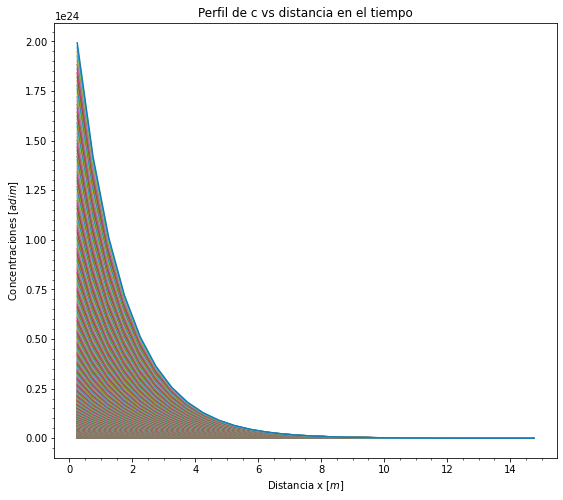

In [16]:
#------------------------------------------------------------------------------------------#
#------------- Datos de entrada: Fuente hoja de cálculo excel WMA -------------------------#
#------------------------------------------------------------------------------------------#
import sys

long_x = 15.0                         #Longitud en "x" en [ft]
teta = 1.0                            #Adimensional [Adim.]
DH = 1.0                              #coefciente de difusión??? [m2/dia]
r = -0.02                             #recarga o descarga  [1/dia]
cr = 0.0                              #concentración de recarga [Adim.]
nds_x = 30                            #Cantidad de nodos en "x"
t_sim = 50.8                          #Tiempo de simulación (dias)
#dt = 0.4                              #Paso de tiempo (dias)
#dt = 0.1                              #Paso de tiempo (dias)
dt = 0.01                              #Paso de tiempo (dias)
q_inf = 1.0                           #Condición de frontera izquierda en [m/dia]
c_inf = 0.0                           #Condición de frontera izquierda en [m/dia]
c_out = 0.0                           #Condición de frontera derecha en [m/dia]
long_ini_cini = 1.0                   #Posición inicial de las condiciones iniciales de concentraciones en [ft]
long_fin_cini = 7.5                   #Posición final de las condiciones iniciales de concentraciones en [ft]

#------------------------------------------------------------------------------------------#
#--------------------------- Malla de simulación espcio y tiempo ----------------------------#
#------------------------------------------------------------------------------------------#

delta_x = long_x/nds_x                                           #Delta en "x" considerando un espaciamiento homogéneo entre nodos en [m]
xi = np.linspace((delta_x)/(2), long_x-(delta_x/2), nds_x)        #Posición de los nodos en "i" en [m]
x_frntrs = np.linspace(0, long_x, nds_x+1)                      #Posición de las fronteras "i+1/2 e i-1/2" en [m]

t = np.arange(0, t_sim+0.01, dt)           #Vector de tiempo en [Días]
nt = len(t)-1                             #numero de pasos de tiempo 

#------------------------------------------------------------------------------------------#
#---------- Calculando los valores de q para cada nodo y fronteras de la celdas ----------------#
#------------------------------------------------------------------------------------------#

q_frnts = np.zeros(nds_x+1)                       #Vector de q en las fronteras de las celdas en [m/dias]
q_i = np.zeros(nds_x)                             #Vector de q en los nodos o centros "i" en [m/dias]
for i in range(0, nds_x+1):
    if i == 0:
        q_frnts[i] = q_inf                        #Valor de q en 0-1/2 de la primera frontera (que sería la condición de frontera izquierda de qinf)
    else:
        q_frnts[i] = q_frnts[i-1]+(r*delta_x)    #Valor de q en las demás fronteras en i-1/2, i+1/2 
        q_i[i-1] = (q_frnts[i-1]+q_frnts[i])/2   #Valor de q en los nodos i


#------------------------------------------------------------------------------------------#
#------ Definiendo vectores y matriz  para el sistema de eq lineales ---------------------#
#------------------------------------------------------------------------------------------#

Beta_W = np.zeros(nds_x); Beta_C = np.zeros(nds_x); Beta_E = np.zeros(nds_x); Beta_r = np.zeros(nds_x)                          
Lambda_W = np.zeros(nds_x); Lambda_C = np.zeros(nds_x); Lambda_E = np.zeros(nds_x); Lambda_r = np.zeros(nds_x)
A = np.zeros((nds_x, nds_x))          #Matriz de coeficientes A
R = np.identity(nds_x)
Q = np.zeros((nds_x,nds_x))
D = np.identity(nds_x)

c_ini = np.zeros(nds_x)                       #Vector de condiciones iniciales de c
c_n = np.zeros(nds_x)                         #Vector de valor de c a un paso de tiempo n (necesario para la solución del sistema de ecuaciones)
c_v = np.zeros(nds_x)                         #Vector de valor de c a un paso de tiempo n+1
solcns_c = np.zeros((nt+1, nds_x))            #Matriz de guardado de las c para cada paso de tiempo y en toda la malla 1D (incluyendo las condiciones iniciales al tiempo cero)

#------------------------------------------------------------------------------------------#
#---------------------------- Definiendo condiciones iniciales ----------------------------#
#------------------------------------------------------------------------------------------#

for i in range(0, nds_x):
    if xi[i] >= long_ini_cini and xi[i] <= long_fin_cini:   #Si los nodos en xi están dentro de este rango se tiene la condición inicial de c = 1
        c_ini[i] = 1
    else:
        c_ini[i] = 0                          #Si los nodos en xi no se encuentran dentro del rango se tiene la condición inicial de c = 0

c_n[:] = c_ini[:]                             #Inicializando el vector c_n
solcns_c[0][:] = c_n[:]                       #Guardando el valor de las condiciones iniciales en la matriz de soluciones de c

#------------------------------------------------------------------------------------------#
#------------------------ Inicio del ciclo solución en el tiempo --------------------------#
#------------------------------------------------------------------------------------------#
tiempoComputo_inicial = time()       

for ti in range(0, nt):
        
    #--------------------------------------------------------------------------------------#
    #-- Calculando los coeficientes "A" Y las matrices diagonales D, R, Q, --------#
    #--------------------------------------------------------------------------------------# 
    
    D=D*teta
    R=R*r
    Q[0][0]=q_inf/delta_x
    
    
    for i in range(0, nds_x): 
        if ((i>0)and(i<nds_x-1)):
            A[i][i+1]= -q_frnts[i+1]/(2*delta_x)+DH/(delta_x**2)  
            A[i][i]=   (q_frnts[i+1]-q_frnts[i])/(2*delta_x)-(2*DH)/(delta_x**2)
            A[i][i-1]=  q_frnts[i]/(2*delta_x)+DH/(delta_x**2)

        if i==0:
            A[i][i+1]= -q_frnts[i+1]/(2*delta_x)+DH/(delta_x**2)      #¿Cómo se implementa la CF?
            A[i][i]=    q_inf/delta_x+q_frnts[i+1]/(2*delta_x)-DH/(delta_x**2)

        if i==nds_x-1:
            A[i][i]=   -q_frnts[i]/(2*delta_x)-DH/(delta_x**2)        #¿Cómo se implementa la CF?
            A[i][i-1]=  q_frnts[i]/(2*delta_x)+DH/(delta_x**2)
            
    cr_vec=np.ones(nds_x)*cr
    cinf_vec=np.ones(nds_x)*c_inf

    sumaMat=np.dot(A,c_n)+np.dot(R,cr_vec)+np.dot(Q,cinf_vec)
    c_v=c_n+dt*np.linalg.inv(D).dot(sumaMat)
    
    
    solcns_c[ti+1][:] = c_v[:]  
    c_n[:] = c_v[:]                                                                         #Guardando el valor de c al tiempo n que se utilizará en el siguiente paso de tiempo

    print("tiempo de simulacion: " +str(round(dt*(ti+1),2))+" dias" )


#------------------------------------------------------------------------------------------#
#---------------------- Tiempo de ejecución del modelo de simulación ----------------------#
#------------------------------------------------------------------------------------------# 

tiempoComputo_final=time()                                                                         #Toma el valor de tiempo final de ejecución, para  calcuar el tiempo total de la simulación
tiempo_ejec_seg=(tiempoComputo_final-tiempoComputo_inicial)                                               #Calcula el tiempo total de simulación, pasado a segundos
tiempo_ejec_min=(tiempoComputo_final-tiempoComputo_inicial)/60                                            #Calcula el tiempo total de simulación, pasado a minutos
print("\nTiempo de Ejecución:",tiempo_ejec_seg, "[Segundos]","\t", tiempo_ejec_min, "[Minutos]\n")
print("|------------------------------------------------------------------------------|")
print("|-------------------------- FIN DE LA SIMULACIÓN xdxd -------------------------|")
print("|------------------------------------------------------------------------------|")


#------------------------------------------------------------------------------------------#
#--------------------------- Graficando todos los resultados ------------------------------#
#------------------------------------------------------------------------------------------#

plt.figure('Graf_cs',figsize=(9,8))
plt.style.use('fast')
plt.minorticks_on()
plt.title('Perfil de c vs distancia en el tiempo')
for i in range(0, nt+1):
    plt.plot(xi, solcns_c[i][:]) 
# plt.legend(loc=4)
plt.xlabel("Distancia x [$m$]")
plt.ylabel("Concentraciones [$adim$]")                                                                        
plt.grid(True,which='major', color='w', linestyle='-')
plt.grid(True, which='minor', color='w', linestyle='--')

